# Парная линейная регрессия

## Лабораторная_работа_№2_Машинное_обучение_ДПИ22_1с_Берникова_Валерия

Задания для самостоятельного выполнения
1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.
6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [288]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [289]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [290]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [291]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

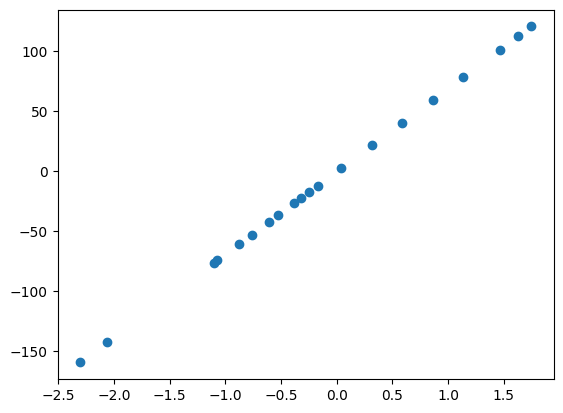

In [292]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [294]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [295]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


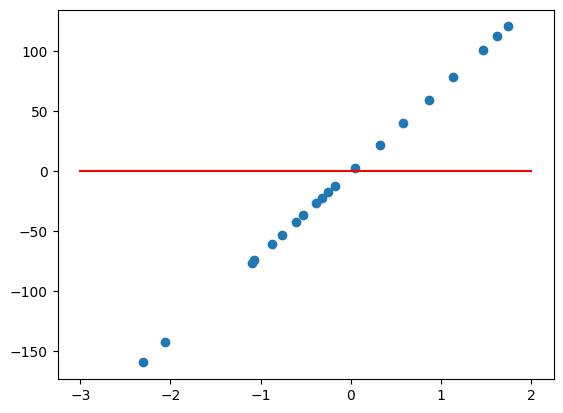

In [296]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [297]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


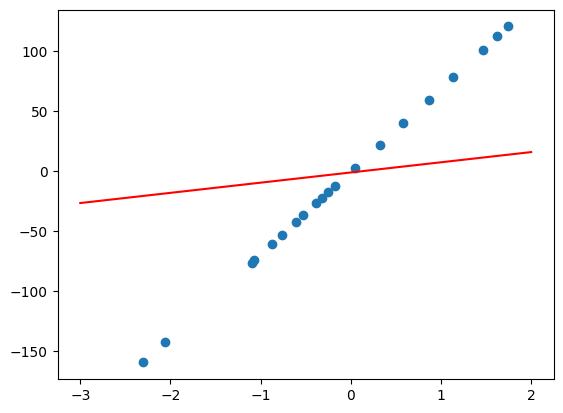

In [298]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Задания для самостоятельного выполнения
1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.


In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 10 
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 10 
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.0005): 
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [283]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 10 
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1  *  X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2*len(X)))
    def fit(self, X, Y, alpha=0.0005): 
        if isinstance(X, pd.DataFrame): 
            X = X.values
        if isinstance(Y, pd.DataFrame):
            Y = Y.values
        steps, errors = [], []
        step = 0        
        for _ in range(2500):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y)  *  X) /len(X)
            self.b0 -= alpha  *  dJ0
            self.b1 -= alpha  *  dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [299]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 10
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.0005, tolerance=0.000001, max_steps=5000):
        if isinstance(X, pd.DataFrame): 
            X = X.values
        if isinstance(Y, pd.DataFrame):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = float('inf')
        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if abs(new_err - prev_err) < tolerance:
                break
            prev_err = new_err
        return steps, errors

5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 10
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.0005, tolerance=0.000001, max_steps=5000):
        if isinstance(X, pd.DataFrame): 
            X = X.values
        if isinstance(Y, pd.DataFrame):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = float('inf')
        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if abs(new_err - prev_err) < tolerance:
                break
            prev_err = new_err
        return steps, errors

6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 10
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))
    def fit(self, X, Y, alpha=1, tolerance=0.000001, max_steps=5000):
        if isinstance(X, pd.DataFrame): 
            X = X.values
        if isinstance(Y, pd.DataFrame):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = float('inf')
        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X.flatten()) / len(X)
            new_b0 = self.b0 - alpha * dJ0
            new_b1 = self.b1 - alpha * dJ1
            new_err = self.error(X, Y)
            if new_err > prev_err:  
                alpha /= 2
                self.b0 = self.b0
                self.b1 = self.b1
            else:
                self.b0 = new_b0
                self.b1 = new_b1
                prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
            if alpha < 0.000001:  
                break
        return steps, errors

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 10
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))
    def fit(self, X, Y, alpha=1, tolerance=0.000001, max_steps=5000):
        if isinstance(X, pd.DataFrame): 
            X = X.values
        if isinstance(Y, pd.DataFrame):
            Y = Y.values
        steps, errors = [], []
        step = 0
        prev_err = float('inf')
        while step < max_steps:
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X.flatten()) / len(X)
            new_b0 = self.b0 - alpha * dJ0
            new_b1 = self.b1 - alpha * dJ1
            new_err = self.error(X, Y)
            if new_err > prev_err: 
                alpha /= 2
            else:
                self.b0 = new_b0
                self.b1 = new_b1
                prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
            if alpha < 0.000001:  
                break
        return steps, errors
    def plot_fit(self, X, Y):
        plt.figure()
        plt.scatter(X, Y, label='Data')
        min_x, max_x = np.min(X), np.max(X)
        min_y, max_y = self.predict(min_x), self.predict(max_x)
        plt.plot([min_x, max_x], [min_y, max_y], color='red', label='Linear Regression')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

In [ ]:
# для 7ого пункта
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J) 
hyp.plot_fit(x, y)

In [300]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J) 

error after gradient descent: 6.098822086274447


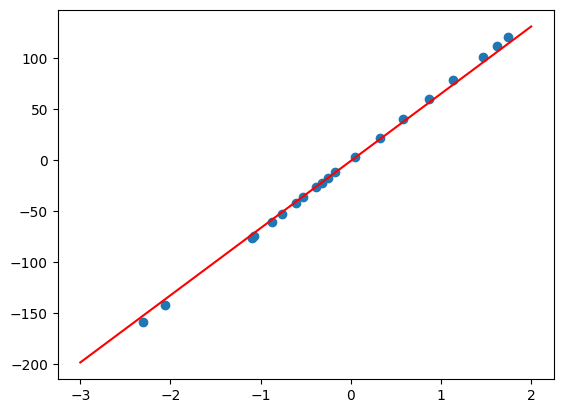

In [301]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

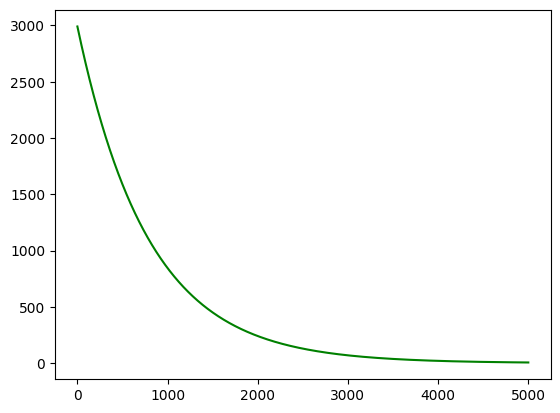

In [302]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()